[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


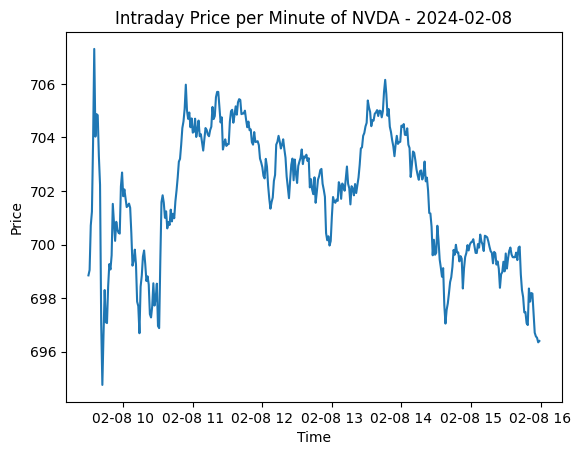

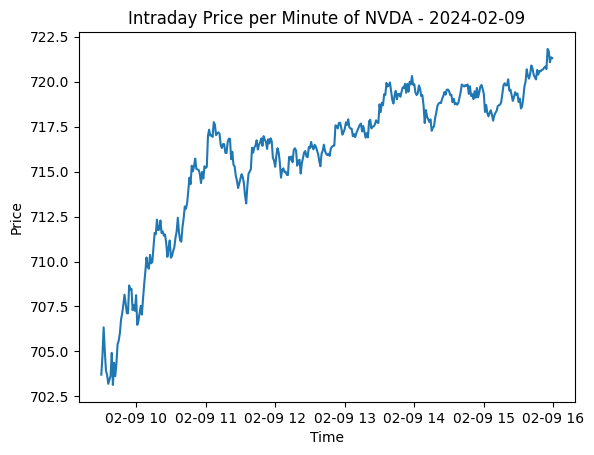

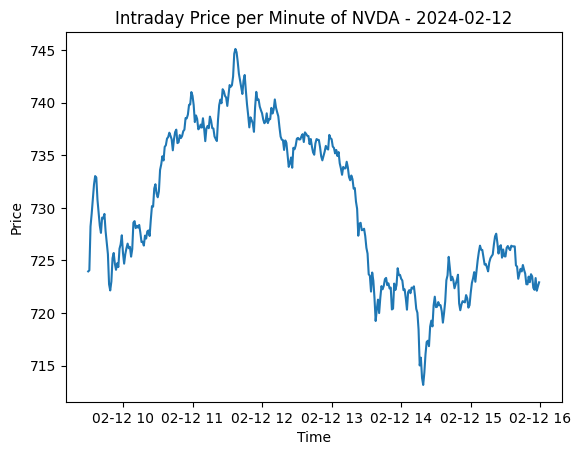

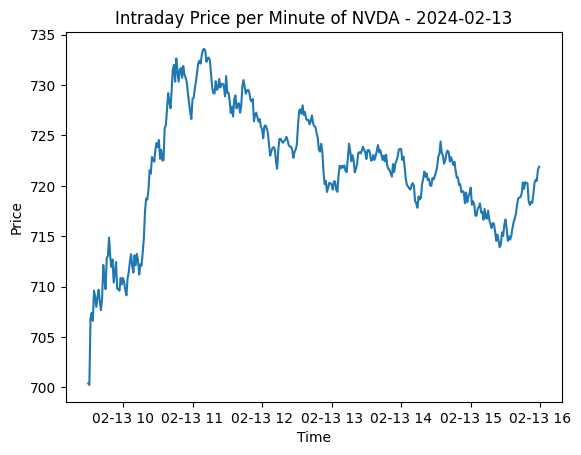

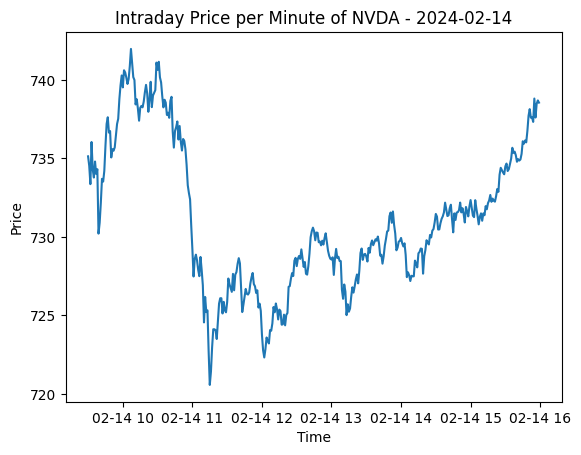

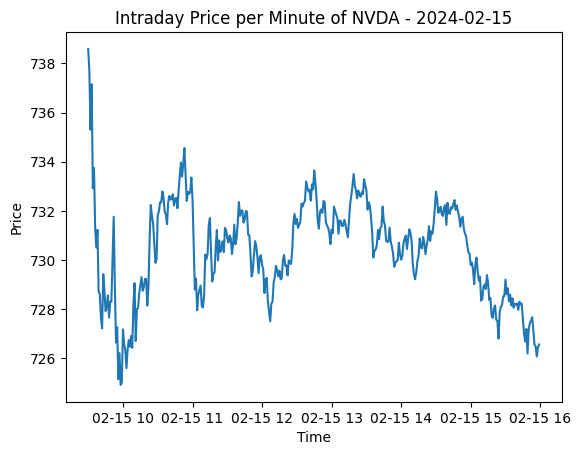

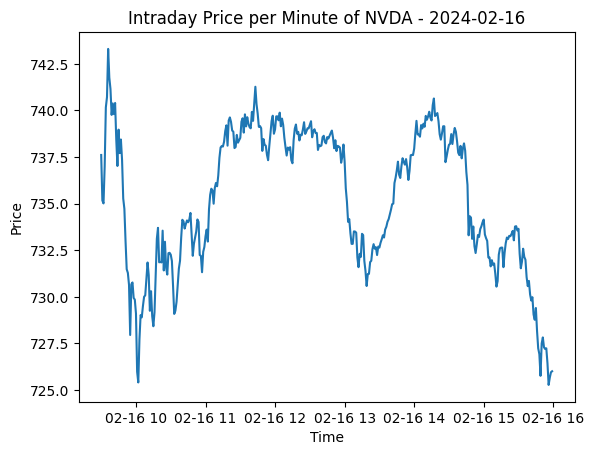

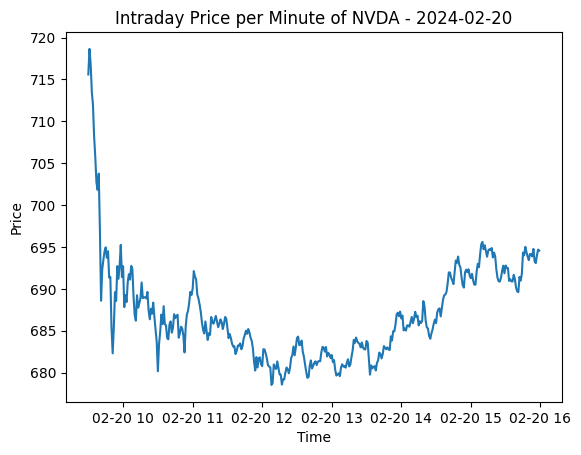

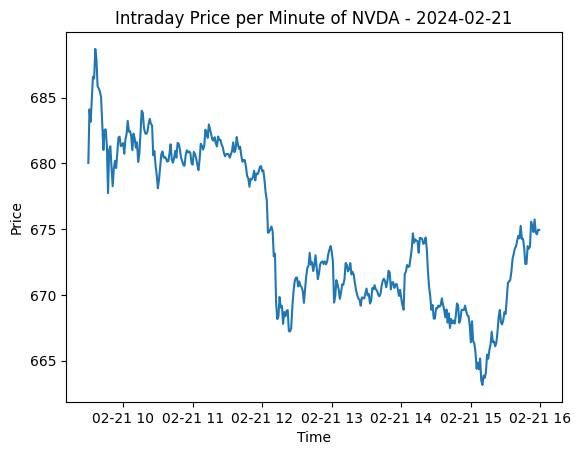

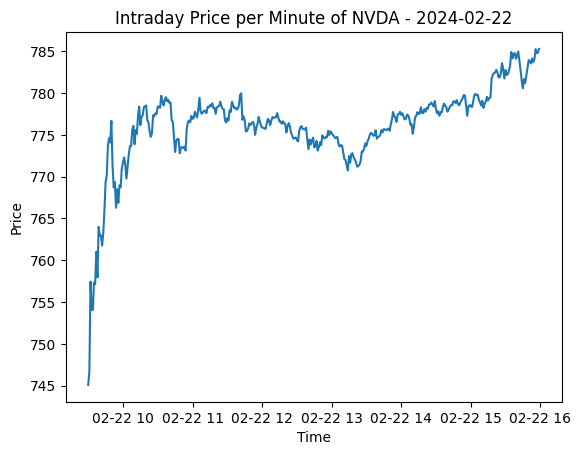

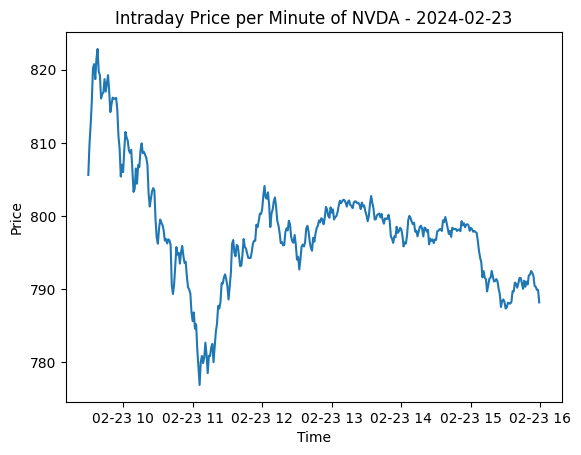

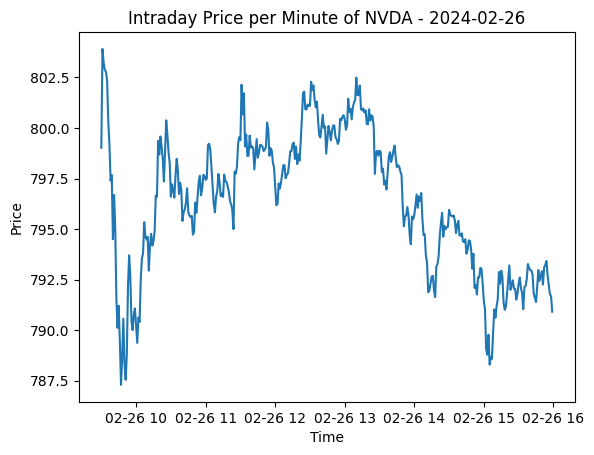

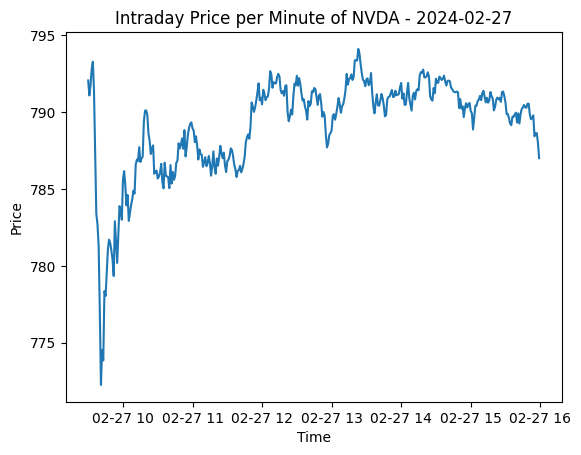

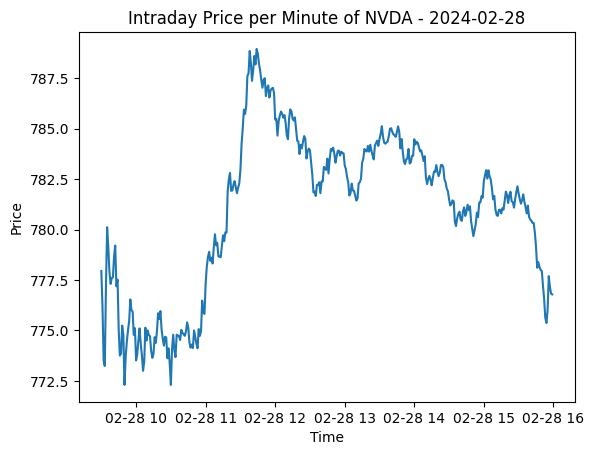

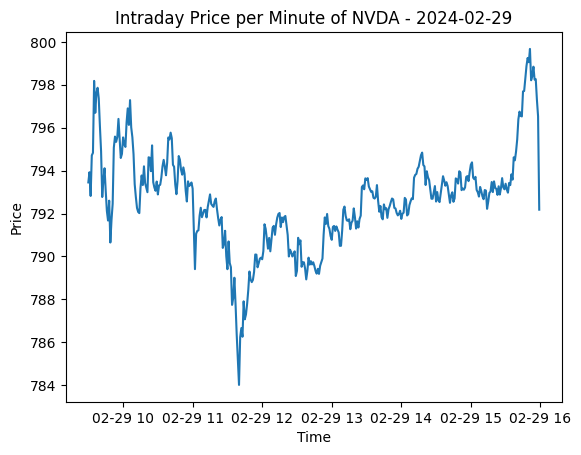

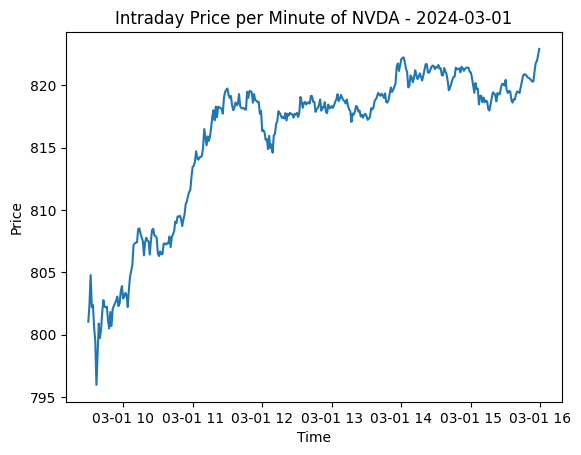

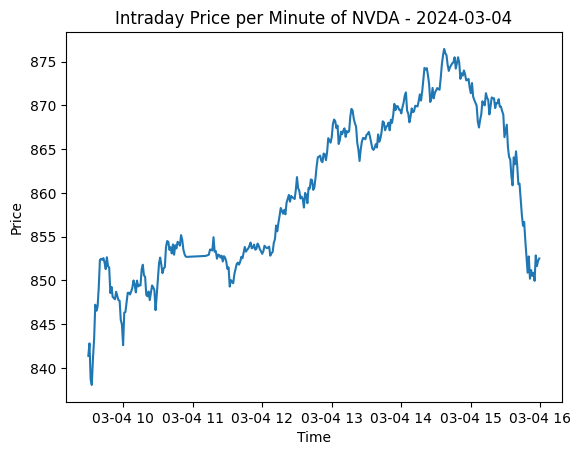

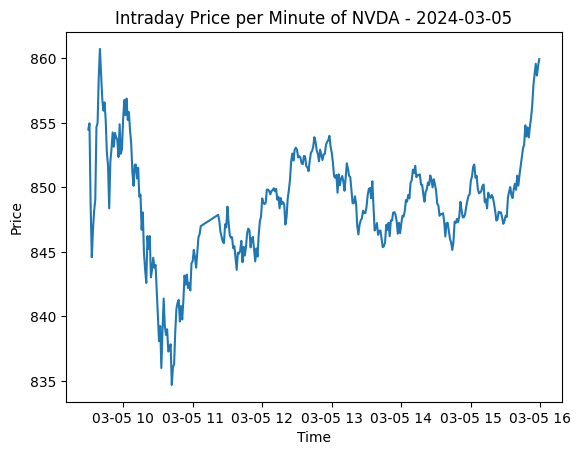

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to fetch intraday data for a given date range
def fetch_intraday_data(ticker_symbol, start_date, end_date):
    return yf.download(ticker_symbol, start=start_date, end=end_date, interval="1m")

# Download intraday data in chunks of 7 days
ticker_symbol = "NVDA"
start_date = "2024-02-08"
end_date = "2024-03-06"
stock_data_chunks = []

while start_date < end_date:
    next_date = (pd.to_datetime(start_date) + pd.DateOffset(days=7)).strftime("%Y-%m-%d")
    if next_date > end_date:
        next_date = end_date
    stock_data_chunk = fetch_intraday_data(ticker_symbol, start_date, next_date)
    stock_data_chunks.append(stock_data_chunk)
    start_date = next_date

# Plot intraday price per minute for each day within each chunk
for stock_data_chunk in stock_data_chunks:
    for day, data in stock_data_chunk.groupby(stock_data_chunk.index.date):
        plt.figure()
        plt.plot(data.index, data["Close"])
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.title("Intraday Price per Minute of " + ticker_symbol + " - " + str(day))
        plt.show()